# 선형회귀분석

25.07.21(월) 오전수업 11주 48일차

# 회귀(Regression)
평균으로 돌아간다

# 회귀 분석

- 통계학에서 회귀는 여러 개의 독립 변수와 하나의 종속 변수 사이의 상관 관계를 모델링하는 기법을 통칭한다.
- 여러 개의 독립 변수에 따라 하나의 종속 변수가 어떤 관계를 나타내는지 모델링하고 연속적인 값을 예측하는 방법이다.
- 여기서 종속 변수 Y,  독립 변수 X에 영향을 미치는 회귀 계수가 W 이다.
    - 금융 관련 예측(주택 가격 또는 주가)
    - 판매 및 프로모션의 효과 예측
    - 자동차 성능 테스트
    - 날씨 분석 및 예측

실측치와 모델의 예측치 사이 차이 (즉 회귀식에서 오차) 잔차가 평균으로 돌아가는 것

![평균회귀분석1](images\평균회귀분석1.png)
![평균회귀분석2](images\평균회귀분석2.png)

## 회귀 분석의 종류

독립 변수의 갯수에 따라 **단일 회귀와 다중 회귀**, 회귀 계수가 선형이냐 아니냐에 따라  **선형회귀와 비선형 회귀**로 구분한다.

1. 선형회귀
    - 여러 변수 간 관계를 가장 잘 대표하는 하나의 선을 찾는 기법
    - 선형 모델은 **회귀 계수를 선형 결합으로 표현**할 수 있는 모델을 의미함.
    - 선형 회귀는 **독립변수와 종속변수의 관계를 선형 관계로 모델링**하며, 간단하고 해석이 용이함.
    
    ![선형회귀](images\선형회귀.png)
    
2. 릿지(Ridge) : 일반 선형회귀에 L2 규제를 추가한 회귀 모델, 회귀 계수의 제곱에 대해 페널티를 부여하여 과적합을 방지하는 모델이다.
    - L2규제
        
        상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
        
3. **라쏘(Lasso):** L1 규제를 사용하며, 중요하지 않은 피처의 계수를 0으로 만들어 피처 선택 기능을 제공
    - L1 규제
        
        모든 회귀 계수의 절대값 합을 최소화하는 방식으로 작동한다. 이는 중요하지 않은 피처의 계수를 정확히 0으로 만들어 자동으로 피처 선택 효과를 제공한다. 따라서 라쏘는 불필요한 피처를 제거하여 모델을 단순화하는 데 효과적이다.
        
4. **엘라스틱넷:** L1과 L2 규제를 모두 사용하는 모델로, 주요 피처는 유지하면서 계수의 크기도 조정
    
    
    ![엘라스틱넷](images\엘라스틱넷.png)
    
5. **로지스틱 회귀:** 분류 문제에 사용되는 회귀 모델로, 이진 분류, 다중 분류, 희소 영역의 분류 등에 사용

# 선형 회귀

실제 값과 예측값의 차이(오류의 제곱 값)을 최소화 하는 직선형 회귀선을 최적화하는 방법이다.  

데이터를 가장 잘 설명하는  직선을 찾는 것이 선형회귀이다.

독립변수 𝑥 로부터 종속변수  𝑦 를 예측하는 알고리즘이다.

![선형회귀1](images\선형회귀1.png)

![선형회귀2](images\선형회귀2.png)

### 독립변수와 종속변수

독립변수는 영향을 주는 변수로, 다른 변수에 의존하지 않고 자체적으로 결정되는 변수

예를 들어 주택 가격 예측 모델에서 집의 크기, 위치, 건축 연도 등이 독립변수

반면 종속변수는 독립변수의 영향을 받아 변화하는 결과값으로, 예측하고자 하는 대상

### 회귀 계수

독립 변수가 1개인 단순 선형 회귀에서 기울기 w1과 절편 w0를 회귀 계수라고 한다.  

### 오류와 잔차

이렇게 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다.  

최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미로, 동시에 오류 값의 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미이다.

![오류와잔차](images\오류와잔차.png)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 단순 선형 회귀

독립 변수와 종속 변수가 각각 하나인 가장 기본적인 선형 회귀이다. 

데이터의 분포를 가장 잘 설명하는, 오차가 최소인 직선을 찾는 과정이다.

>💡한 개의 데이터에 대한 오차(error) = 실제 값(y) – 예측값(y^) = 잔차(residual)


![단순선형회귀](images\단순선형회귀.png)

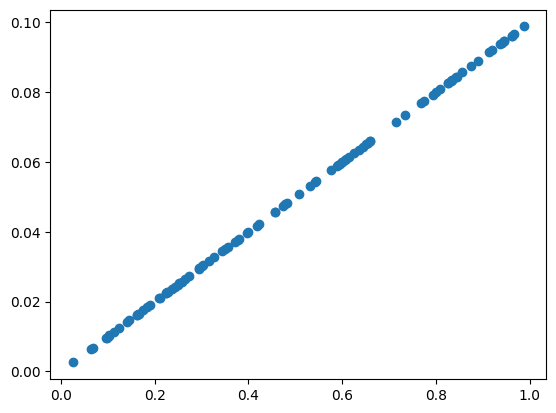

In [3]:
X = np.random.rand(100)
y = 0.2 * X * 0.5  #ax+b

plt.scatter(X,y)


In [4]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [5]:
# 경사하강법 y=wX+b , w결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 #임의 값

Epoch 0, W : -0.8767, Error : 0.2561


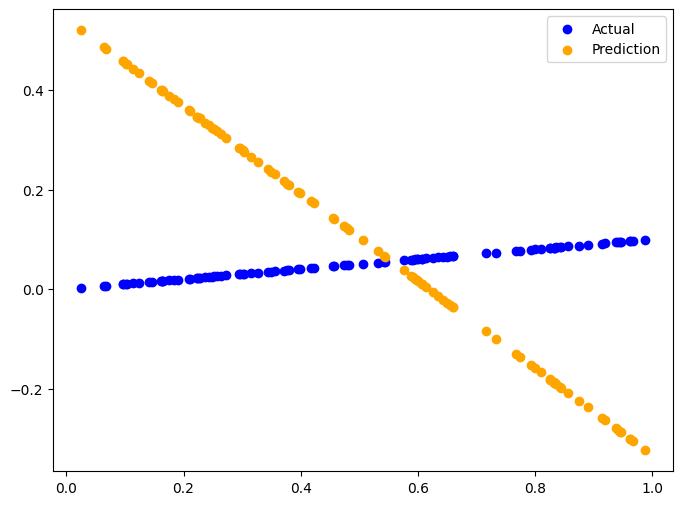

Epoch 10, W : -0.6183, Error : 0.1853


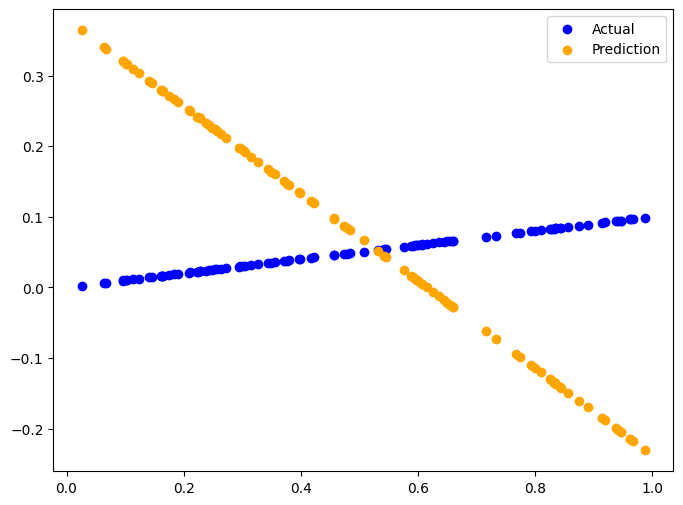

Epoch 20, W : -0.4225, Error : 0.1348


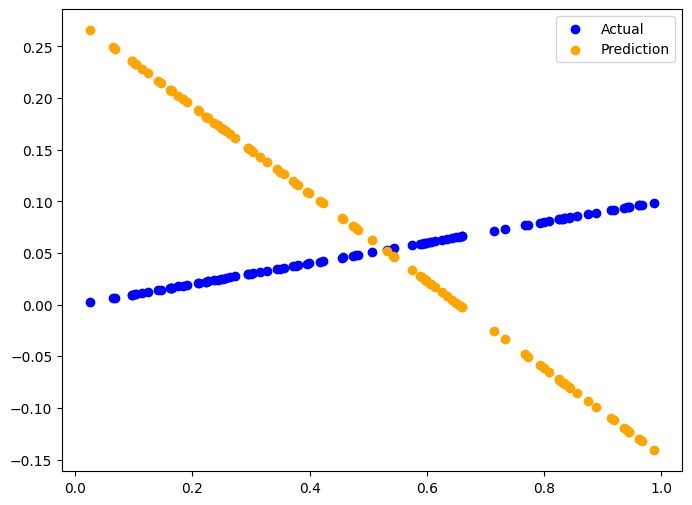

Epoch 30, W : -0.2801, Error : 0.0980


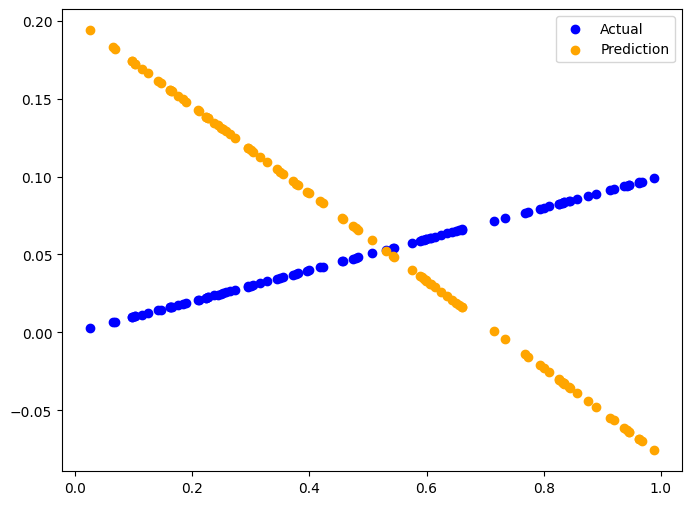

Epoch 40, W : -0.1765, Error : 0.0713


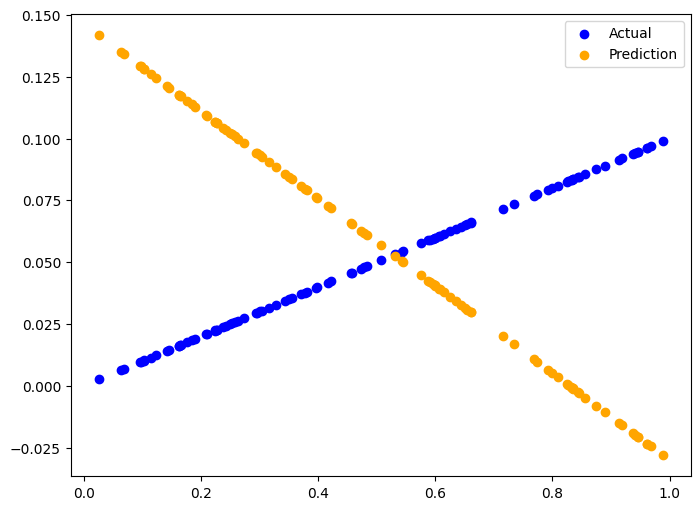

Epoch 50, W : -0.1011, Error : 0.0519


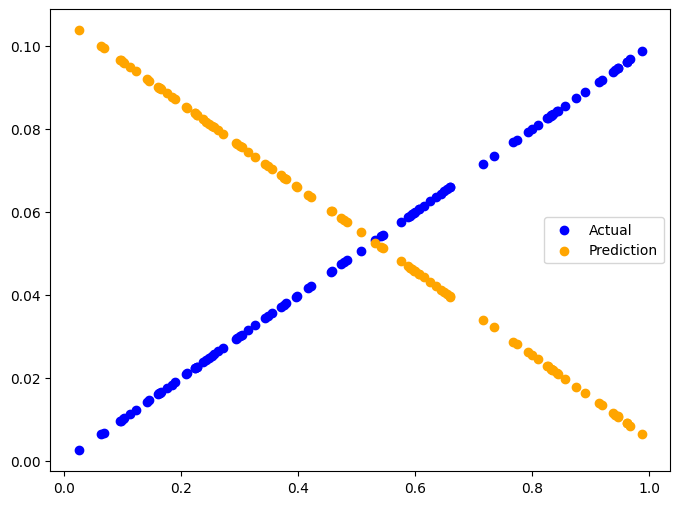

Epoch 60, W : -0.0463, Error : 0.0377


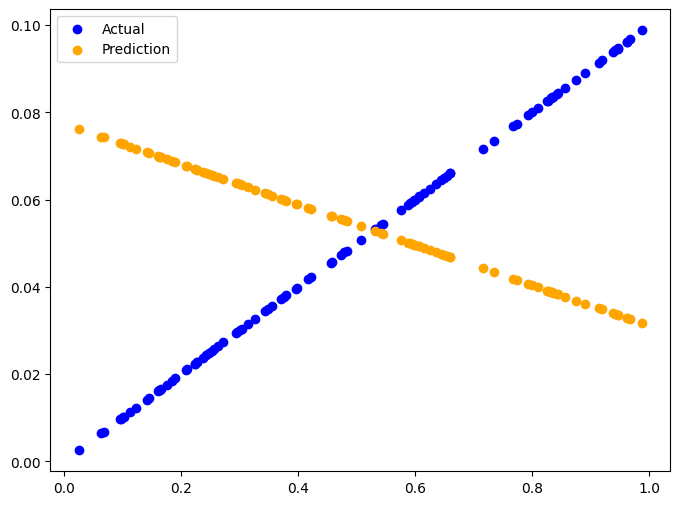

Epoch 70, W : -0.0064, Error : 0.0275


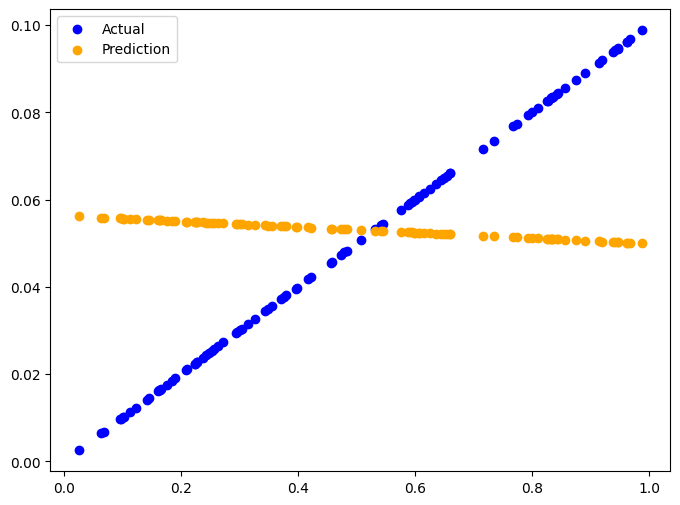

Epoch 80, W : 0.0226, Error : 0.0200


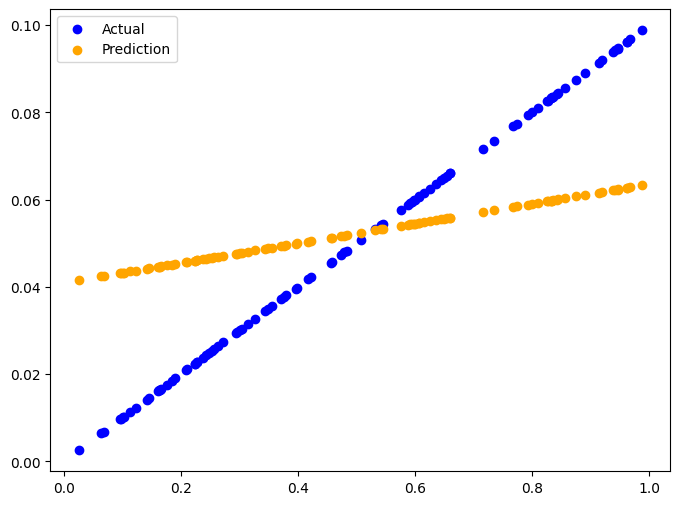

Epoch 90, W : 0.0437, Error : 0.0145


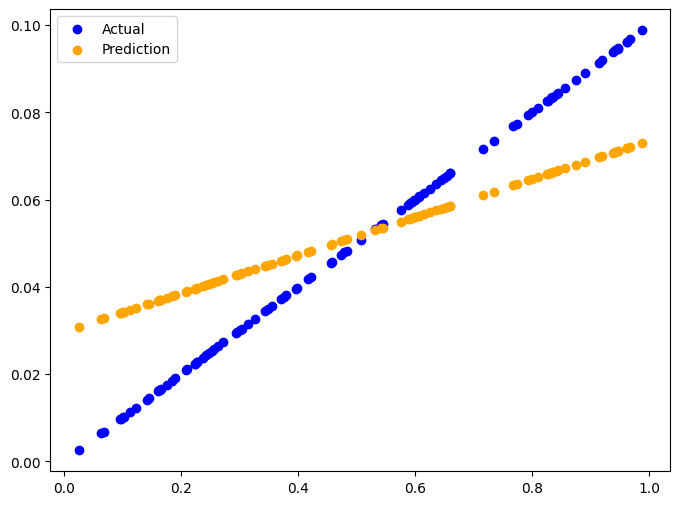

In [6]:
for epoch in range(100):
  y_pred = W * X + b
  error = np.abs(y_pred - y ).mean()
  if error < 0.001 : 
    break
  W_descent = learning_rate * ( (y_pred - y)*X).mean()
  b_descent = learning_rate * ( (y_pred - y).mean())
  W = W - W_descent
  b = b - b_descent
  
  if epoch%10 == 0 : 
    print( f'Epoch {epoch}, W : {W:.4f}, Error : {error:.4f}')
    y_pred = W * X + b
    plt_prediction(y_pred, y)
  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

오류 합을 계산하는 방법에는 두 가지 주요 접근 방식이 있다. 

### MAE (Mean Absolute Error)

오차의 절대값을 평균한 것으로, MAE가 0에 가까울수록 추측한 값이 원본에 가깝다. 오차의 절대값을 사용하기 때문에 오차가 양수인지 음수인지는 알 수 없다.  오차의 단위는 레이블과 동일하다.

![MAE](images\MAE.png)

**MAE는 회귀 모델의 평가지표로 사용되며, 특이값의 영향을 상대적으로 적게 받는다.**

### MSE (Mean Squared Error)

오차의 제곱을 평균한 것으로, MSE가 0에 가까울수록 추측한 값이 원본에 가까워진다. 이는 예측값과 실제값의 차이를 평균한 것으로  **회귀 모델에서 비용함수로 사용한다.**

값을 제곱하면 작은 오차는 더 작아지고 큰 오차는 더 커지는 왜곡이 발생하므로 특이값(이상치)의 영향을 더 많이 받는 경향이 있으며, 모든 함수 값에서 미분이 가능하다.

![MSE1](images\MSE1.png)

![MSE2](images\MSE2.png)

## 사이킷런의 LinearRegression 클래스

사이킷런의 `LinearRegression`은 OLS 알고리즘을 기본적으로 사용하여 선형 회귀를 학습하지만, 여러 추가적인 기능을 제공한다.

### **최소자승법 (OLS, Ordinary Least Squares)**

OLS는 수학적으로 선형 회귀 문제를 해결하기 위한 핵심 방법론으로 잔차(residual)의 제곱합(RSS)을 최소화하는 회귀 계수를 찾는 알고리즘이다.   데이터가 선형 관계를 가지며, 독립 변수 간 다중공선성이 없다는 가정하에서 수학적으로 직접 해를 계산하거나, 경사 하강법을 사용하여 최적화한다.

- 파라미터
    - `fit_intercept :`절편(Intercept) w0w_0w0를 계산할지 여부를 제어하는 파라미터.
    - `normalize`: 독립 변수 X\mathbf{X}X를 정규화(평균 0, 분산 1)할지 여부를 결정.
- 학습 결과 값
    - `coef_:`  학습된 **기울기(회귀 계수)**
    - `intercept_:`  학습된 **절편**

## 평가 지표

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다.   

![평가지표](images\평가지표.png)

사이킷 런에서는 RMSE는 제공하지 않아, MSE에 제곱근을 씌워 계산하는 함수를 직접 만든다.

## 다중 선형 회귀(Multiple Linear Regression)

종속 변수 y가 여러 독립 변수들에 의해 복합적으로 영향을 받는 경우에 적용하는 회귀 모델로, 현실 세계의 복잡한 관계를 더 정확하게 분석할 수 있다. 독립 변수가 여러 개일 때 각 변수가 종속 변수에 미치는 개별적인 영향력을 동시에 파악할 수 있다는 장점이 있다.

하나의 결과를 여러 원인 요소로 세분화하여 설명할 수 있으며, 각 독립 변수의 상대적 중요도와 기여도를 정량적으로 평가할 수 있다. 이를 통해 어떤 요인이 결과에 가장 큰 영향을 미치는지 파악하는 데 도움이 된다.

![다중선형회귀1](images\다중선형회귀1.png)

![다중선형회귀2](images\다중선형회귀2.png)

**독립변수 선택 방법**

- 독립변수 중 종속변수를 설명하는데 필요한 변수만 모델에 포함시켜야 함
- 중요한 독립 변수를 포함시키는 방법:
    1. 전진선택법(Forward Selection): 독립 변수를 하나씩 추가하면서 모델을 만들고 결과 확인
    2. 후진제거법(Backward Elimination): 데이터에 있는 모든 독립 변수를 사용해 모델을 만들고 하나씩 제거한 후 결과 확인

**다중 선형 회귀를 적용할 수 있는 사례**
![다중선형회귀3](images\다중선형회귀3.png)


# Polynomial Regression(다항 회귀)

다항 회귀는 기본적으로 선형 회귀의 확장 형태로, 선형 모델을 사용하지만 비선형 관계를 모델링할 수 있는 방법이다. 

- 다항 회귀는 입력 특성을 다항식으로 변환하여(특성 공학) 선형 회귀 알고리즘을 적용
- 다항 회귀는 **모델 파라미터(계수)는 선형 결합이며, 입력 변수 x와 출력 변수 y 사이의 관계는 비선형이다.**
- x의 제곱, 세제곱 등의 항이 포함되어 곡선 형태의 관계를 표현
- 독립 변수의 차수를 높임으로써 복잡한 곡선 관계를 표현

```python
y = w0 + w1x + w2x² + w3x³ + ... + wnxⁿ
```

여기서 n은 다항식의 차수를 나타내며, 차수가 높아질수록 더 복잡한 비선형 관계를 모델링한다. 

- 1차 다항식: 직선 형태 (선형 회귀와 동일)
- 2차 다항식: 포물선 형태
- 3차 이상의 다항식: 더 복잡한 곡선 형태

### `PolynomialFeatures` 클래스

사이킷런에서 다중회귀를 지원하는 방법으로 피처를 다항식 피처로 변환한다.  

- `degree`: 최고차항의 차수를 지정합니다. 기본값은 2입니다.
- `interaction_only`: True일 경우 상호작용 항만 생성하고 제곱항은 생성하지 않는다.
- `include_bias`: True일 경우 편향(상수항) 특성을 추가.
    
    예를 들어, [a, b] 형태의 입력에 대해 degree=2로 설정하면:
    
    - 상수항: 1
    - 1차항: a, b
    - 2차항: a², ab, b²
    
    위와 같은 형태로 특성이 확장된다.

## 다항회귀와 과소적합, 과적합

복잡한 다항관계를 모델링할 때 다항식의 차수가 높아 질 수록 **매우 복잡한 피처간의 관계를 모델링**할 수 있다.  하지만 차수가 높아 질수록 학습 데이터에만 너무 맞춘 학습이 이루어져 정작 테스트 환경에서는 오히려 정확도가 떨어진다.  즉 차수가 높아질수록 과적합의 문제가 크게 발생한다.

![다항회귀](images\다항회귀.png)

- 실선으로 표시된 예측 곡선은 다항 회귀 예측 곡선이며,
- 점선으로 표현된 곡선은 실제 데이터 세트 X,Y의 코사인 곡선이다.
- Degree1: 단순 선형회귀와 동일한 직선으로, 실제 데이터 세트인 코사인 데이터 세트를 예측하기에는 너무 단순하여 **"과소적합" 현상**을 보인다.
- Degree4: 실제 데이터 세트와 유사한 모습을 보이며, 약간의 잡음이 있지만 **학습 데이터를 비교적 잘 반영한 모델**이라고 볼 수 있다.
- Degree15 :  MSE 값이 비정상적이고 예측 곡선이 실제 곡선과 완전히 다른 형태를 보인다. 이는 학습 데이터에 지나치게 맞춰진 **심각한 과적합 상태**를 나타낸다.

## 편향-분산 트레이드 오프

- **편향(Bias):** 모델의 예측값과 실제 값의 차이,  높은 편향은 모델이 데이터의 중요한 패턴을 놓치고 있다는 의미이고 과소적합(underfitting)으로 이어진다.
- **분산(Variance):** 모델이 다른 학습 데이터셋으로 훈련될 때 예측의 변동성을 의미한다. 높은 분산은 모델이 학습 데이터의 노이즈까지 학습하여 과적합(overfitting)된 상태를 나타낸다.

- 위의 다항 회귀 그래프를 **편향-분산 관점**에서 분석하면:
    - **Degree 1 (높은 편향, 낮은 분산):** 모델이 너무 단순하여 높은 편향을 보이며, 데이터의 실제 패턴을 포착하지 못하는 과소적합 상태이다. 분산은 낮지만, 예측의 정확도가 떨어진다.
    - **Degree 4 (적절한 편향-분산 균형):** 모델이 데이터의 실제 패턴을 적절히 포착하면서도 과도한 복잡성을 피하고 있다. 편향과 분산이 적절히 균형을 이루어 좋은 일반화 성능을 보인다.
    - **Degree 15 (낮은 편향, 높은 분산):** 모델이 학습 데이터의 노이즈까지 학습하여 높은 분산을 보이는 과적합 상태이다. 새로운 데이터에 대한 예측 성능이 매우 떨어질 수 있다.

모델의 복잡도를 조절할 때는 편향과 분산 사이의 적절한 균형점을 찾는 것이 중요하다. 편향을 줄이려고 모델을 복잡하게 만들면 분산이 증가하고, 분산을 줄이려고 모델을 단순화하면 편향이 증가하는 트레이드오프 관계가 존재한다.

# 선형 회귀 모델을 위한 데이터의 변환

### **1. 스케일링/정규화**

- 독립 변수의 크기가 다를 때, 모델 학습 과정에서 큰 값에 의해 편향되는 것을 방지.
- 선형 회귀는 거리 기반 알고리즘이기 때문에 스케일 차이가 크면 성능이 저하될 수 있음.
- 일반적으로 피처나 타깃 값의 분포가 심하게 왜곡되었을 때 수행한다.

### **2. 규제 (Regularization)**

- 모델의 복잡도를 줄이고 과적합(Overfitting)을 방지.
- 큰 가중치를 억제하여 모델이 불안정해지는 것을 방지.

### **3. 로그 함수 변환**

- 특성이 비선형적이거나, 데이터 분포가 왜곡되어 있을 때 이를 완화.
- 이상치(outlier)의 영향을 줄이고, 비대칭적인 데이터를 정규화.
- 데이터가 **지수적 증가**(Exponential Growth)를 보이는 경우 로그 변환을 적용한다.
- 타깃 값의 경우 일반적으로 로그 변환을 적용한다.

In [1]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()